In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt

In [13]:
lattice = pb.Lattice(a1=[1, 0], a2=[-1/2, sqrt(3)/2])
N = 4
t = 0.5
t2 = 1

lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), 
    ('B', np.array([sqrt(3)/2, 1/2])*1/N),
    ('C', np.array([sqrt(3)/2, -1/2])*1/N), 
    ('D', np.array([0, -1])*1/N), 
    ('E', np.array([-sqrt(3)/2, -1/2])*1/N), 
    ('F', np.array([-sqrt(3)/2, 1/2])*1/N), 
)

lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 0], 'B', 'C', t),
    ([0, 0], 'C', 'D', t),
    ([0, 0], 'D', 'E', t),
    ([0, 0], 'E', 'F', t),
    ([0, 0], 'F', 'A', t),
    
    ([1, 1], 'A', 'E', t2),
    ([0, 1], 'A', 'C', t2),
    ([1, 0], 'B', 'F', t2),
    ([1, 0], 'C', 'E', t2),
    ([1, 1], 'B', 'D', t2),
    ([0, -1], 'D', 'F', t2),

)

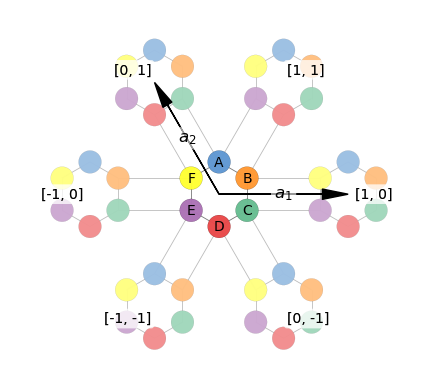

In [16]:
lattice.plot()
plt.gca().axis('off');

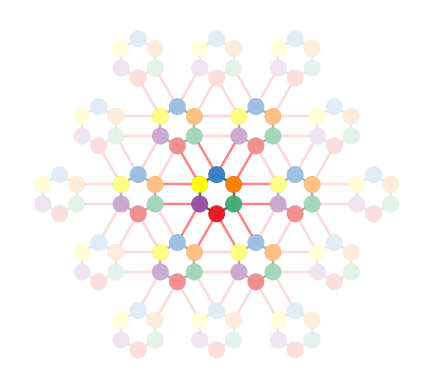

In [17]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)

#model = pb.Model(
#    lattice,
#)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

plt.gca().axis('off');

In [18]:
lattice.brillouin_zone()

[array([-2.0943952 , -3.62759876]),
 array([ 2.0943952 , -3.62759876]),
 array([4.18879028, 0.        ]),
 array([2.0943952 , 3.62759876]),
 array([-2.0943952 ,  3.62759876]),
 array([-4.18879028,  0.        ])]

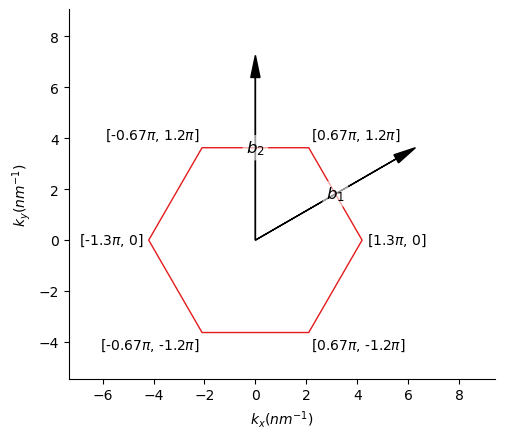

In [19]:
lattice.plot_brillouin_zone()


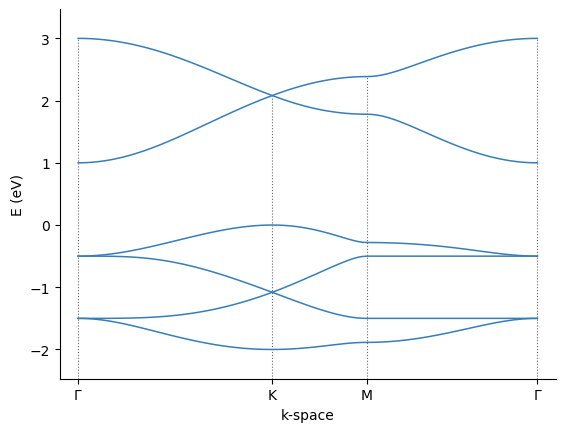

In [20]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = [-2.0943952 ,  3.62759876]
M = 1/2*G2
bands = solver.calc_bands(Gamma, K, M, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'K', 'M', r'$\Gamma$'])

In [100]:
a1 = np.array([1, 0])
a2 = np.array([-1/2, sqrt(3)/2])
lattice = pb.Lattice(a1 = a1, a2 = a2)
N = 4
M = 100
cladding = 16
for i in range(-M, M):
    for j in range(-M, M):
        if j - 2*i + cladding < 0:
            continue
        if 2*i - j + cladding < 0: 
            continue
        if i - 2*j + cladding < 0:
            continue
        if 2*j - i + cladding < 0: 
            continue
        if i + j + cladding < 0: 
            continue
        if -i -j + cladding < 0: 
            continue
        lattice.add_sublattices(
    (f'A{i} {j}', np.array([0, 1])*1/N + i*a1+j*a2), 
    (f'B{i} {j}', np.array([sqrt(3)/2, 1/2])*1/N+ i*a1+j*a2),
    (f'C{i} {j}', np.array([sqrt(3)/2, -1/2])*1/N + i*a1+j*a2), 
    (f'D{i} {j}', np.array([0, -1])*1/N + i*a1+j*a2), 
    (f'E{i} {j}', np.array([-sqrt(3)/2, -1/2])*1/N + i*a1+j*a2), 
    (f'F{i} {j}', np.array([-sqrt(3)/2, 1/2])*1/N + i*a1+j*a2), 
)

In [101]:
t = 0.5
t2 = 1
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'D{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'D{i} {j}', f'E{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'E{i} {j}', f'F{i} {j}', t)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'F{i} {j}', f'A{i} {j}', t)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'E{i+1} {j+1}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j+1}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'F{i+1} {j}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'E{i+1} {j}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'D{i+1} {j+1}', t2)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'D{i} {j}', f'F{i} {j-1}', t2)
        except: 
            pass 

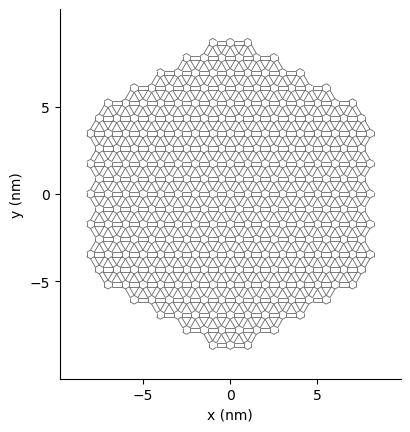

In [102]:
model = pb.Model(
    lattice,
)

model.plot(
          hopping = {
  "width": 1,
})

In [103]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues

(-0.3, 0.5)

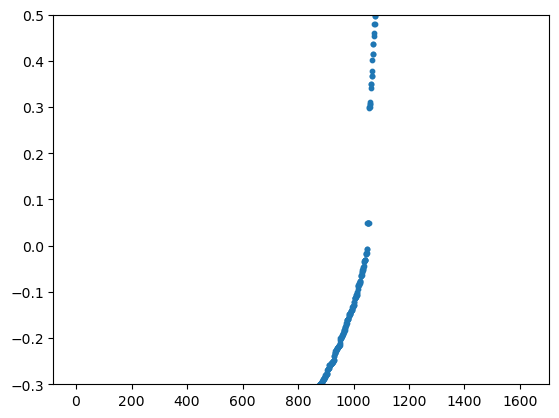

In [115]:
plt.scatter(range(0, np.size(bands)), bands, s=10)
plt.ylim(-0.3, 0.5)

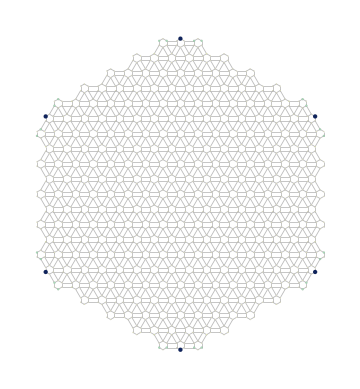

In [118]:
ldos = solver.calc_spatial_ldos(energy=0.05, broadening=0.01)  # eV
ldos.plot(site_radius=(0.03, 0.12))
plt.gca().axis('off');